In [21]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [22]:
#read dataset
x=pd.read_csv('train.csv')
y=pd.read_csv('test.csv')

In [23]:
#keep copy of dataframe
x1=x.copy()
y1=y.copy()

do some data visulization and getting info about dataset

In [24]:
x.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
y.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [26]:
x.info() # gives that age,cabin and embarked has some null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [27]:
x.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [28]:
x.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [29]:
y.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Filling null values

In [30]:
x.Age.fillna(x.Age.mean(),inplace=True)    #filled all null values in age by mean

In [31]:
x.Age.isnull().sum()

0

In [32]:
x.Embarked.fillna(x.Embarked.mode()[0],inplace=True) #filled all null values in embarked by mode

In [33]:
x.Embarked.isnull().sum()

0

In [89]:
y.Fare.fillna(y.Fare.mean(),inplace=True)        

Dropping uncessary column

In [35]:
col=['PassengerId','Name','Cabin']
x.drop(col,axis=1,inplace=True)

In [36]:
y.drop(col,axis=1,inplace=True)

In [37]:
print(x.head(),'\n' ,y.head())

   Survived  Pclass     Sex   Age  SibSp  Parch            Ticket     Fare  \
0         0       3    male  22.0      1      0         A/5 21171   7.2500   
1         1       1  female  38.0      1      0          PC 17599  71.2833   
2         1       3  female  26.0      0      0  STON/O2. 3101282   7.9250   
3         1       1  female  35.0      1      0            113803  53.1000   
4         0       3    male  35.0      0      0            373450   8.0500   

  Embarked  
0        S  
1        C  
2        S  
3        S  
4        S   
    Pclass     Sex   Age  SibSp  Parch   Ticket     Fare Embarked
0       3    male  34.5      0      0   330911   7.8292        Q
1       3  female  47.0      1      0   363272   7.0000        S
2       2    male  62.0      0      0   240276   9.6875        Q
3       3    male  27.0      0      0   315154   8.6625        S
4       3  female  22.0      1      1  3101298  12.2875        S


Do some encoding for categorical value

In [87]:
x.Sex=pd.get_dummies(x.Sex,drop_first=True)
y.Sex=pd.get_dummies(y.Sex,drop_first=True)

In [88]:
x.Embarked=pd.get_dummies(x.Embarked,drop_first=True)
y.Embarked=pd.get_dummies(y.Embarked,drop_first=True)

Do some plotting for Visualization

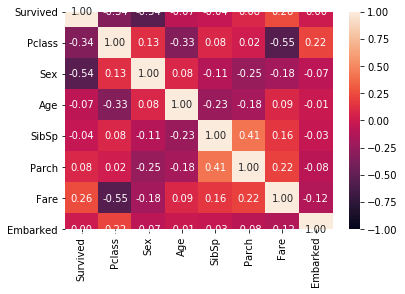

In [46]:

sns.heatmap(x.corr(),annot=True,fmt='.2f',vmin=-1,vmax=1)

From graph u can see that Pclass ,Sex,Embarked doen not correlated with survived,but lets do some plotting again

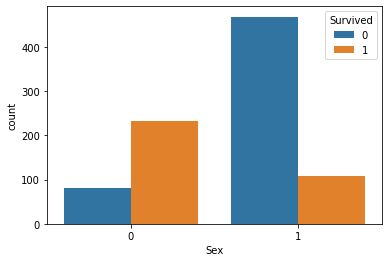

In [47]:
sns.countplot(x.Sex,hue=x['Survived']) #female has more survived chances than male

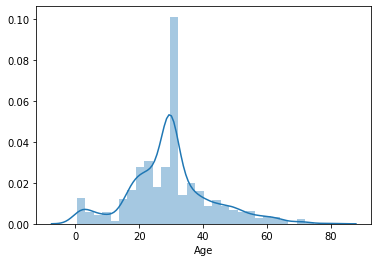

In [48]:
sns.distplot(x.Age)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000218BA96ED68>,
      dtype=object)

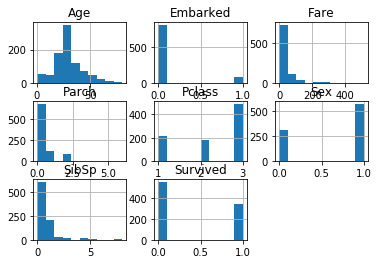

In [49]:
x.hist()

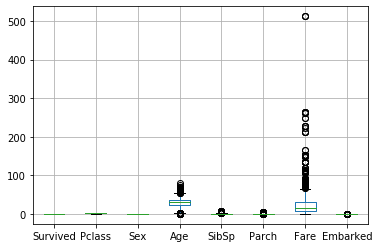

In [50]:
x.boxplot()       #shows oulier

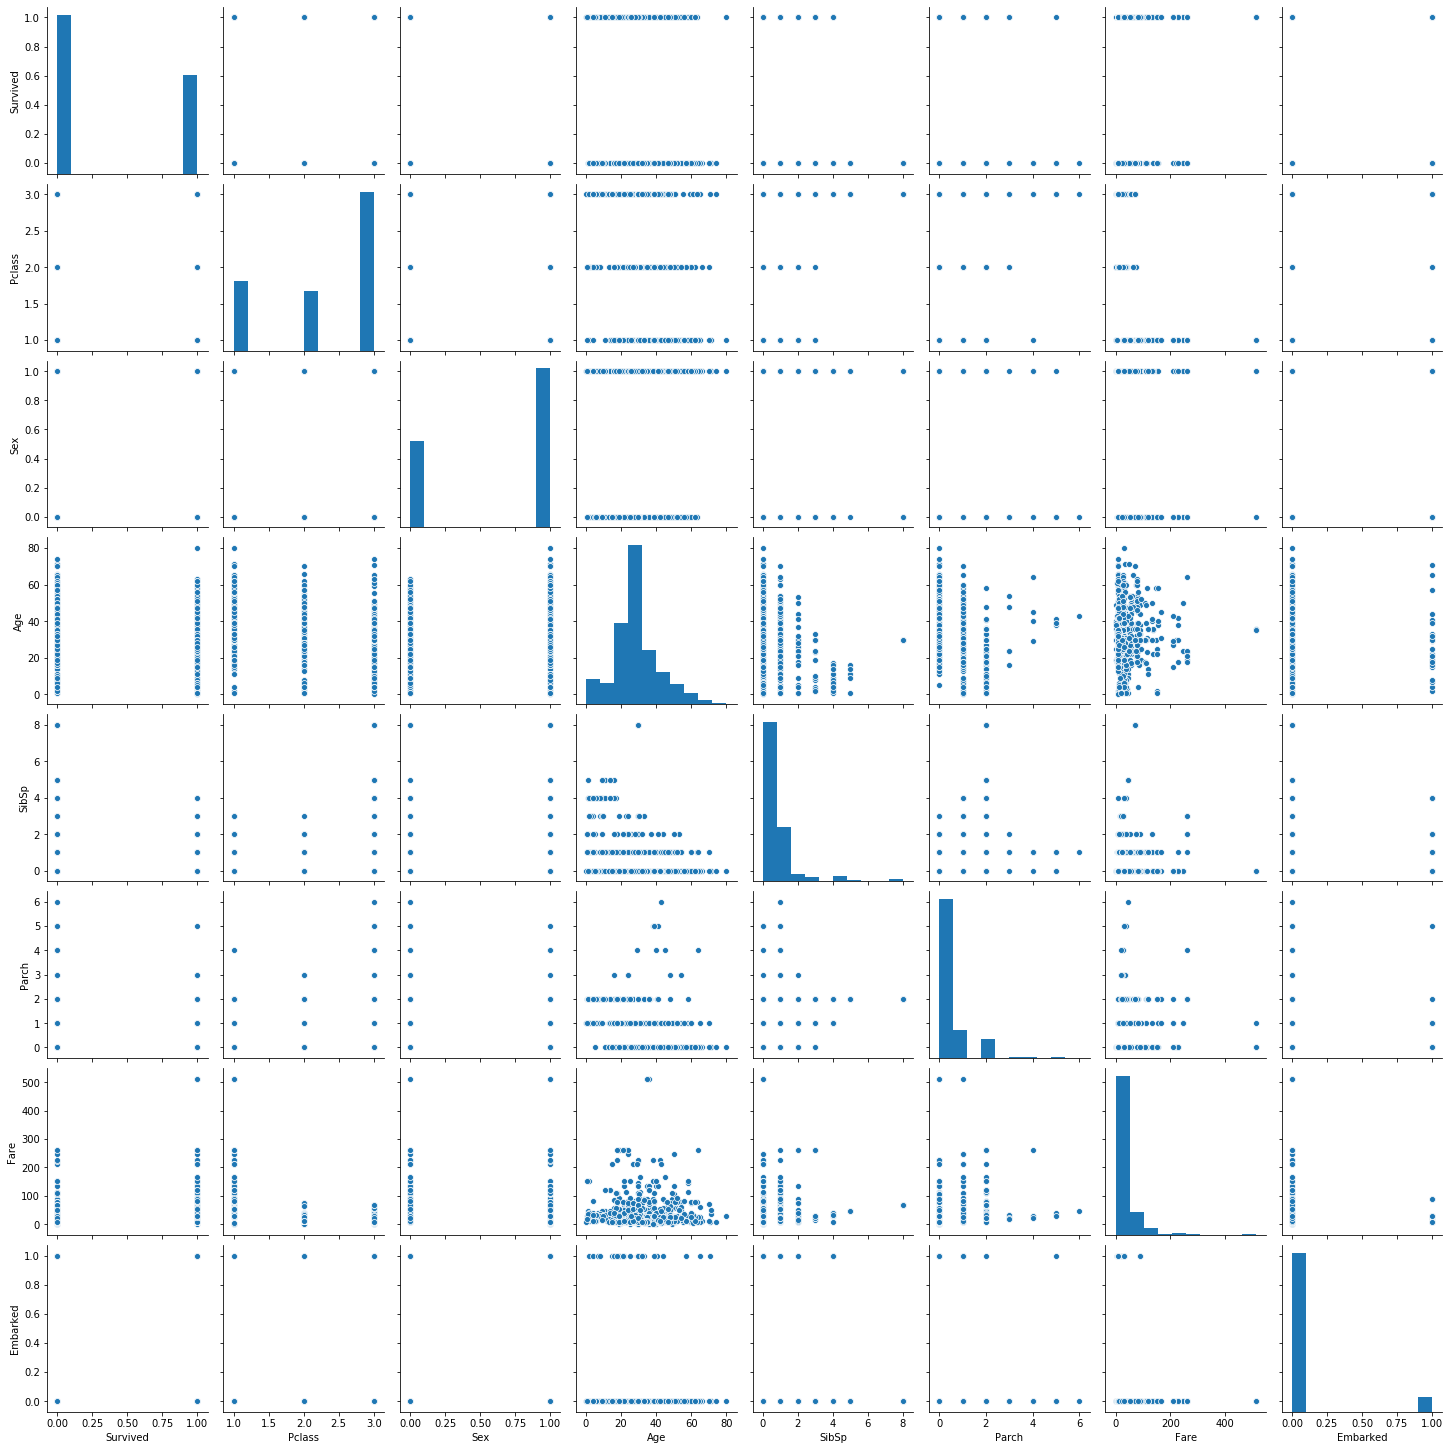

In [51]:
sns.pairplot(x)

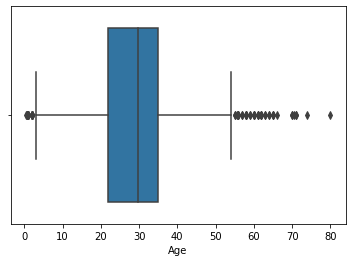

In [52]:
sns.boxplot(x.Age)         #has outlier

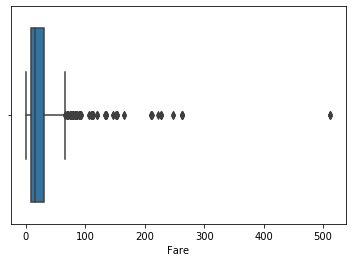

In [53]:
sns.boxplot(x.Fare)        #has outlier

In [54]:
x.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1,22.0,1,0,A/5 21171,7.2500,0
1,1,1,0,38.0,1,0,PC 17599,71.2833,0
2,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,0
3,1,1,0,35.0,1,0,113803,53.1000,0
4,0,3,1,35.0,0,0,373450,8.0500,0


In [55]:
y.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,1,34.5,0,0,330911,7.8292,1
1,3,0,47.0,1,0,363272,7.0000,0
2,2,1,62.0,0,0,240276,9.6875,1
3,3,1,27.0,0,0,315154,8.6625,0
4,3,0,22.0,1,1,3101298,12.2875,0


In [56]:
x.drop('Ticket',axis=1,inplace=True)      #dropping column

In [57]:
y.drop('Ticket',axis=1,inplace=True)


In [58]:
x.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0


In [59]:
target=x['Survived']           #saving survived value into target

In [60]:
x.drop('Survived',axis=1,inplace=True)  #dropping survived column

In [61]:
from sklearn.model_selection import train_test_split      #splitting train dataset

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,target,test_size=.3,random_state=0)

Applying some model

In [63]:
from sklearn.linear_model import LogisticRegression       

In [64]:
lr=LogisticRegression()

In [65]:
lr.fit(x_train,y_train)

C:\Users\Ketaki\anaconda3\envs\mypython\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
pred=lr.predict(x_test)

In [67]:
from sklearn.metrics import accuracy_score

In [68]:
accuracy_score(pred,y_test)

0.7947761194029851

In [69]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(x_train,y_train)
sv_pred=sv.predict(x_test)
accuracy_score(sv_pred,y_test)

C:\Users\Ketaki\anaconda3\envs\mypython\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7089552238805971

In [70]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_pred=sv.predict(x_test)
accuracy_score(knn_pred,y_test)

0.7089552238805971

In [71]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree.fit(x_train,y_train)
tree_pred=sv.predict(x_test)
accuracy_score(tree_pred,y_test)

0.7089552238805971

In [72]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
nb_pred=nb.predict(x_test)
accuracy_score(nb_pred,y_test)

0.7835820895522388

In [84]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=0)
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)
accuracy_score(rf_pred,y_test)

C:\Users\Ketaki\anaconda3\envs\mypython\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8395522388059702

In [86]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass      418 non-null int64
Sex         418 non-null uint8
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        418 non-null float64
Embarked    418 non-null uint8
dtypes: float64(2), int64(3), uint8(2)
memory usage: 17.3 KB


In [90]:
y.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,0
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,0
4,3,0,22.0,1,1,12.2875,0


In [98]:
y.Age.fillna(y.Age.mean(),inplace=True)       #filling null of test dataset

In [99]:
y.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [100]:
y_pred=rf.predict(y)

In [163]:
sub=pd.read_csv('gender_submission.csv')

In [164]:
sub['PassengerId']

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [ ]:
Applying Stdscaler and pca technique

In [107]:
from sklearn.preprocessing import StandardScaler

In [108]:
from sklearn.decomposition import PCA

In [109]:
std_scl=StandardScaler()
pca=PCA(n_components=2)

In [110]:
x2=x.copy()
y2=y.copy()

In [111]:
x=std_scl.fit_transform(x)
y=std_scl.fit_transform(y)

In [112]:
x_pca=pca.fit_transform(x)
y_pca=pca.fit_transform(y)

In [135]:
x_train,x_test,target_train,target_test=train_test_split(x,target,test_size=.30,random_state=0)

In [136]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=0)
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)
accuracy_score(rf_pred,y_test)

C:\Users\Ketaki\anaconda3\envs\mypython\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8395522388059702

Voting Classifier

In [137]:
from sklearn.ensemble import  RandomForestClassifier,VotingClassifier

In [152]:
voting = VotingClassifier(estimators=[('lr', lr), ('sv', sv), ('knn', knn),('nb',nb),('tree',tree),('rf',rf)], voting='hard')


In [153]:
voting.fit_transform(x_train,target_train)

C:\Users\Ketaki\anaconda3\envs\mypython\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ketaki\anaconda3\envs\mypython\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([[0, 0, 1, 0, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

In [154]:
voting_pred=voting.predict(x_test)

In [155]:
accuracy_score(voting_pred,y_test)

0.8208955223880597

In [156]:
y_pred1=voting.predict(y)

In [160]:
dict={'PassengerId':sub['PassengerId'],'Survived':y_pred1}

In [161]:
df2=pd.DataFrame(dict)       #creating dataframe

In [162]:
df2.to_csv("submission3.csv",index=False)      #save file into csv